In [1]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [17]:
analysis = scripts.Analysis()

In [18]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band05_wn_980_1100',
                          'P_50_T_250',
                          'min_4.e-26_max_5.e-24_ng_3',
                          'wgt_1_.75_.5',
                          'tropical')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [19]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'h2o',
                               'band05_wn_980_1100',
                               'P_50_T_250',
                               'min_4.e-26_max_5.e-24_ng_3',
                               'wgt_1_.75_.5',
                               'tropical')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [20]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3,]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [21]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [22]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [23]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [24]:
fig.display_hrefanchor()

In [25]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [26]:
table_dgdgs.display_hrefanchor()

In [27]:
for g in [1, 2, 3, ]:
    s = 'Table: flux. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

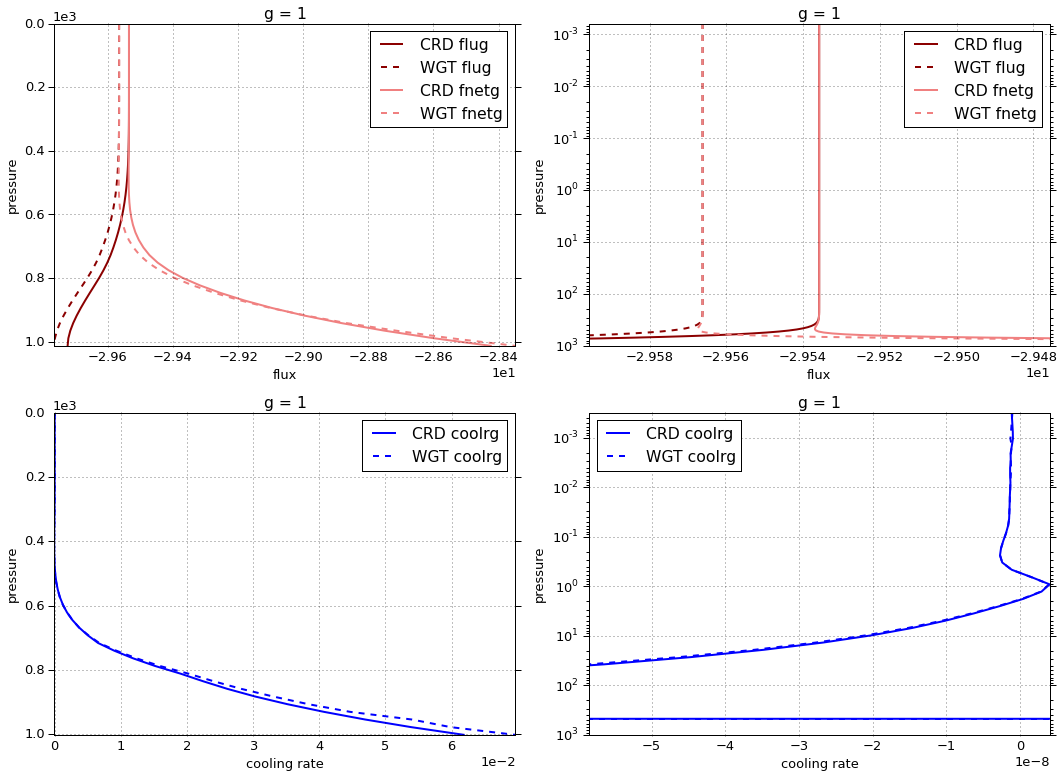

# Figure: flux, cooling rate. g-group 2

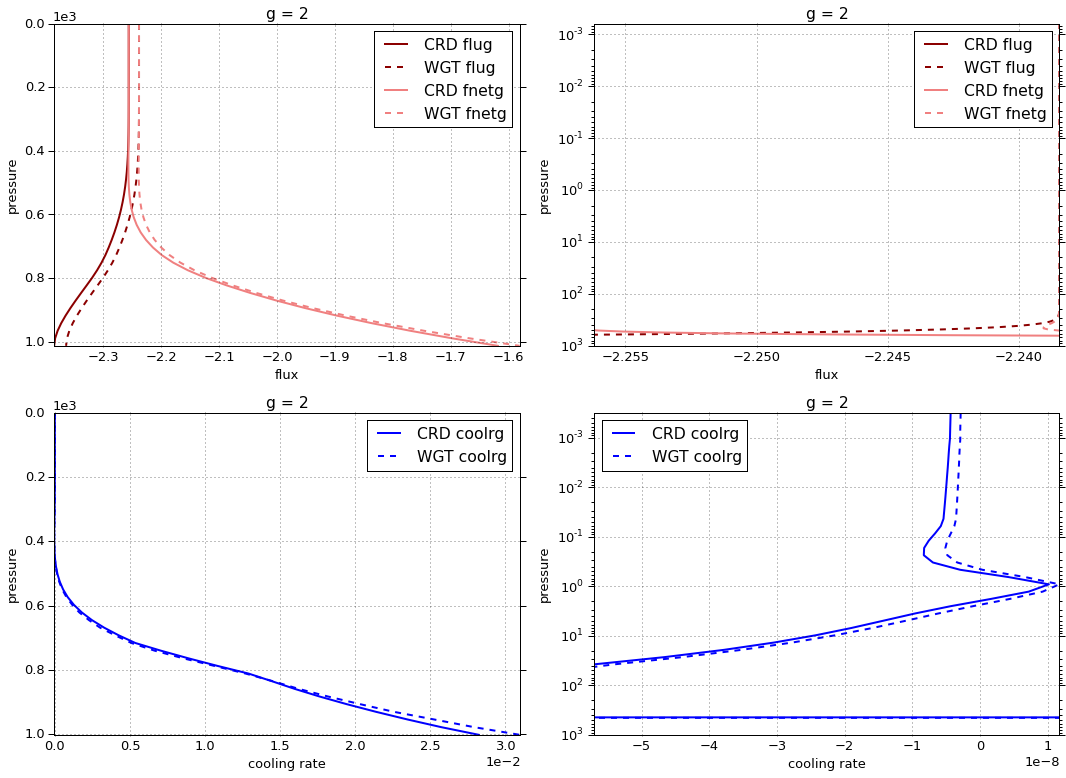

# Figure: flux, cooling rate. g-group 3

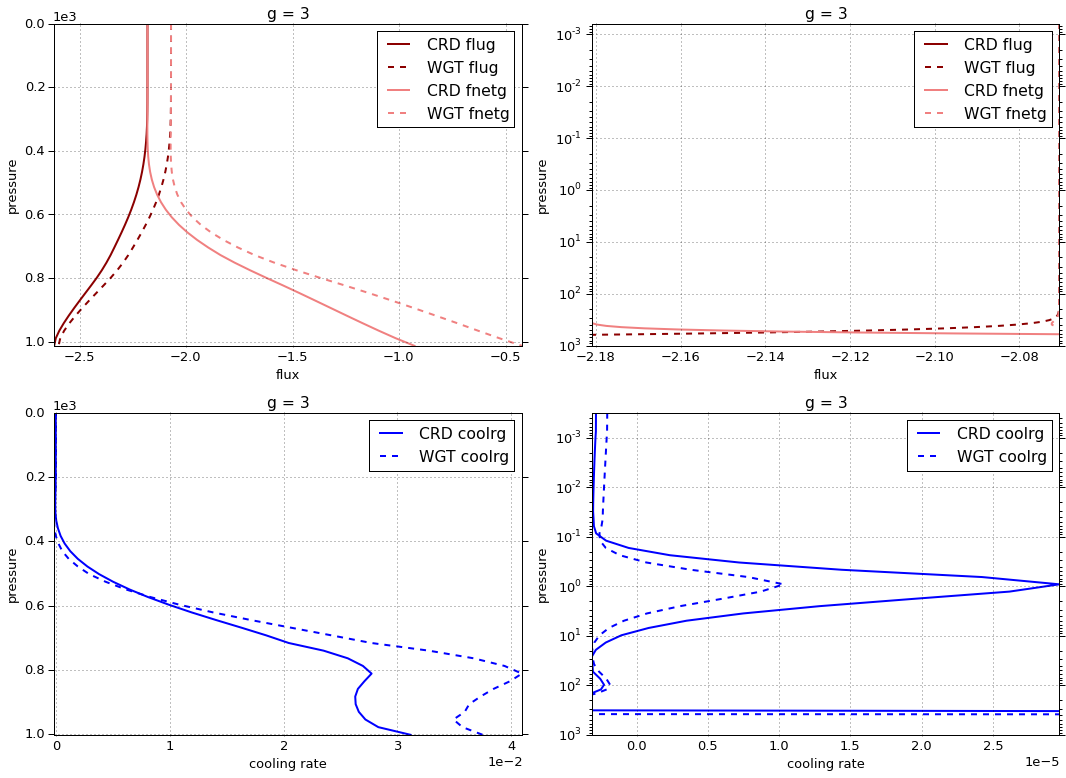

# Figure: flux, cooling rate. g-group total

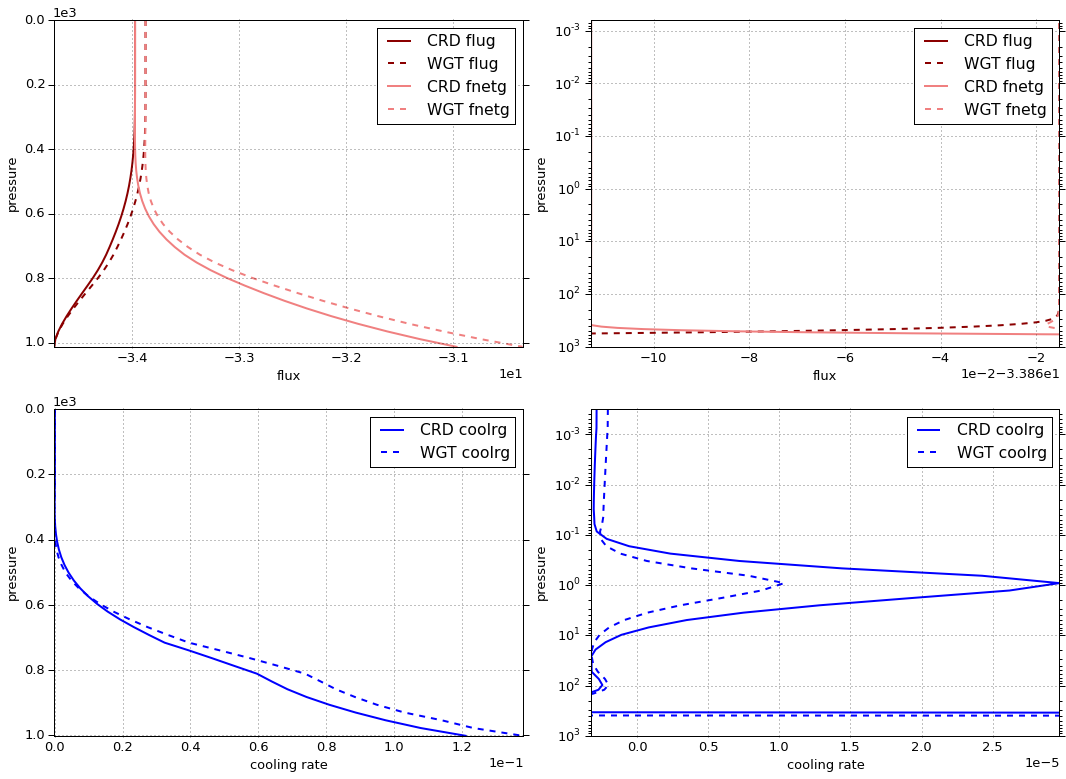

In [28]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [29]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0        1     -29.535820  0.000000 -29.535820
  1013     76    -29.724406  1.300262 -28.424144
2 0        1      -2.256202  0.000000  -2.256202
  1013     76     -2.384996  0.766168  -1.618827
3 0        1      -2.181074  0.000000  -2.181074
  1013     76     -2.619238  1.691671  -0.927567


WGT


flug      fldg      fnetg
g pressure level                                
1 0        1     -29.566186  0.000000 -29.566186
  1013     76    -29.765786  1.416013 -28.349773
2 0        1      -2.238467  0.000000  -2.238467
  1013     76     -2.364410  0.783076  -1.581333
3 0        1      -2.070551  0.000000  -2.070551
  1013     76     -2.598445  2.175539  -0.422905


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1     -0.030366  0.000000 -0.030366
  1013     76    -0.041380  0.115751  0.074371
2 0        1      0.017735  0.000000  0.017735
  1013     76     0.020586  0.016908  0.037494
3 0        1      0.110522  0.000000  0.110522
  1013     76     0.020794  0.483868  0.504661

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer              
1 0.000312    1     -1.104750e-09
  1001.112500 75     6.181978e-02
2 0.000312    1     -4.352955e-09
  1001.112500 75     2.823305e-02
3 0.000312    1     -2.846376e-06
  1001.112500 75     3.114308e-02


WGT


coolrg
g pressure    layer              
1 0.000312    1     -1.008685e-09
  1001.112500 75     6.956859e-02
2 0.000312    1     -2.869948e-09
  1001.112500 75     3.095245e-02
3 0.000312    1     -2.056222e-06
  1001.112500 75     3.748098e-02


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1      9.606530e-11
  1001.112500 75     7.748805e-03
2 0.000312    1      1.483007e-09
  1001.112500 75     2.719395e-03
3 0.000312    1      7.901543e-07
  1001.112500 75     6.337903e-03

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-33.973096,0.000000,-33.973096
1013,76,-34.728640,3.758102,-30.970538



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-33.875205,0.000000,-33.875205
1013,76,-34.728640,4.374629,-30.354012



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,9.789110e-02,0.000000,0.097891
1013,76,-2.000000e-07,0.616527,0.616527


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.000003
1001.112500,75,0.121196



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.000002
1001.112500,75,0.138002



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,7.917334e-07
1001.112500,75,1.680610e-02


In [30]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.853500,0.857096
2,0.069875,0.068082
3,0.076625,0.074821


In [31]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 1

crd                                           wgt        \
              g level       flug          fldg      fnetg   g level   
pressure                                                              
0.000000      1     1 -29.535820  0.000000e+00 -29.535820   1     1   
0.000624      1     2 -29.535820  1.318603e-14 -29.535820   1     2   
0.000876      1     3 -29.535820  1.859065e-14 -29.535820   1     3   
0.001229      1     4 -29.535820  2.659792e-14 -29.535820   1     4   
0.001723      1     5 -29.535820  3.823007e-14 -29.535820   1     5   
0.002417      1     6 -29.535820  5.539273e-14 -29.535820   1     6   
0.003391      1     7 -29.535820  8.052756e-14 -29.535820   1     7   
0.004757      1     8 -29.535820  1.175194e-13 -29.535820   1     8   
0.006672      1     9 -29.535820  1.716282e-13 -29.535820   1     9   
0.009359      1    10 -29.535820  2.511824e-13 -29.535820   1    10   
0.013128      1    11 -29.535820  3.679451e-13 -29.535820   1    11   
0.018415      1    12 -29.535820  5.401009e-13 -29.535820   1    12   
0.025830      1    13 -29.535820  7.948447e-13 -29.535820   1    13   
0.036232      1    14 -29.535820  1.173505e-12 -29.535820   1    14   
0.050823      1    15 -29.535820  1.750636e-12 -29.535820   1    15   
0.071291      1    16 -29.535820  2.755837e-12 -29.535820   1    16   
0.100000      1    17 -29.535820  4.862393e-12 -29.535820   1    17   
0.140271      1    18 -29.535820  9.641337e-12 -29.535820   1    18   
0.196760      1    19 -29.535820  2.069837e-11 -29.535820   1    19   
0.275997      1    20 -29.535820  4.660976e-11 -29.535820   1    20   
0.387100      1    21 -29.535820  1.080940e-10 -29.535820   1    21   
0.543100      1    22 -29.535820  2.555680e-10 -29.535820   1    22   
0.761700      1    23 -29.535820  5.923954e-10 -29.535820   1    23   
1.068500      1    24 -29.535820  1.203021e-09 -29.535820   1    24   
1.498800      1    25 -29.535820  2.057638e-09 -29.535820   1    25   
2.102400      1    26 -29.535820  3.172739e-09 -29.535820   1    26   
2.949000      1    27 -29.535820  4.573428e-09 -29.535820   1    27   
4.136600      1    28 -29.535820  6.363867e-09 -29.535820   1    28   
5.802500      1    29 -29.535820  8.733320e-09 -29.535820   1    29   
8.139200      1    30 -29.535820  1.195857e-08 -29.535820   1    30   
...          ..   ...        ...           ...        ...  ..   ...   
323.525000    1    47 -29.536064  9.421956e-05 -29.535969   1    47   
347.300000    1    48 -29.536276  1.994263e-04 -29.536076   1    48   
371.075000    1    49 -29.536618  3.924037e-04 -29.536226   1    49   
394.850000    1    50 -29.537114  7.077687e-04 -29.536406   1    50   
418.625000    1    51 -29.537809  1.205509e-03 -29.536604   1    51   
442.400000    1    52 -29.538757  1.967384e-03 -29.536789   1    52   
466.175000    1    53 -29.540016  3.102491e-03 -29.536914   1    53   
489.950000    1    54 -29.541653  4.754015e-03 -29.536899   1    54   
513.725000    1    55 -29.543734  7.102711e-03 -29.536632   1    55   
537.500000    1    56 -29.546332  1.038138e-02 -29.535951   1    56   
561.275000    1    57 -29.549516  1.487574e-02 -29.534640   1    57   
585.050000    1    58 -29.553349  2.093637e-02 -29.532413   1    58   
608.825000    1    59 -29.557893  2.899099e-02 -29.528902   1    59   
632.600000    1    60 -29.563189  3.953960e-02 -29.523649   1    60   
656.375000    1    61 -29.569269  5.317315e-02 -29.516096   1    61   
680.150000    1    62 -29.576148  7.054638e-02 -29.505601   1    62   
703.925000    1    63 -29.583829  9.234555e-02 -29.491483   1    63   
727.700000    1    64 -29.592352  1.193570e-01 -29.472995   1    64   
751.475000    1    65 -29.602454  1.547837e-01 -29.447671   1    65   
775.250000    1    66 -29.614132  1.998077e-01 -29.414324   1    66   
799.025000    1    67 -29.627279  2.556476e-01 -29.371631   1    67   
822.800000    1    68 -29.641648  3.235237e-01 -29.318124   1    68   
846.575000    1    69 -29.656207  4.

In [32]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 2

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      2     1 -2.256202  0.000000e+00 -2.256202   2     1 -2.238467   
0.000624      2     2 -2.256202  5.066090e-14 -2.256202   2     2 -2.238467   
0.000876      2     3 -2.256202  7.155927e-14 -2.256202   2     3 -2.238467   
0.001229      2     4 -2.256202  1.020014e-13 -2.256202   2     4 -2.238467   
0.001723      2     5 -2.256202  1.465758e-13 -2.256202   2     5 -2.238467   
0.002417      2     6 -2.256202  2.118060e-13 -2.256202   2     6 -2.238467   
0.003391      2     7 -2.256202  3.073263e-13 -2.256202   2     7 -2.238467   
0.004757      2     8 -2.256202  4.472493e-13 -2.256202   2     8 -2.238467   
0.006672      2     9 -2.256202  6.521533e-13 -2.256202   2     9 -2.238467   
0.009359      2    10 -2.256202  9.526272e-13 -2.256202   2    10 -2.238467   
0.013128      2    11 -2.256202  1.392626e-12 -2.256202   2    11 -2.238467   
0.018415      2    12 -2.256202  2.037609e-12 -2.256202   2    12 -2.238467   
0.025830      2    13 -2.256202  2.983689e-12 -2.256202   2    13 -2.238467   
0.036232      2    14 -2.256202  4.374178e-12 -2.256202   2    14 -2.238467   
0.050823      2    15 -2.256202  6.466179e-12 -2.256202   2    15 -2.238467   
0.071291      2    16 -2.256202  1.004276e-11 -2.256202   2    16 -2.238467   
0.100000      2    17 -2.256202  1.730234e-11 -2.256202   2    17 -2.238467   
0.140271      2    18 -2.256202  3.319683e-11 -2.256202   2    18 -2.238467   
0.196760      2    19 -2.256202  6.849076e-11 -2.256202   2    19 -2.238467   
0.275997      2    20 -2.256202  1.474283e-10 -2.256202   2    20 -2.238467   
0.387100      2    21 -2.256202  3.252713e-10 -2.256202   2    21 -2.238467   
0.543100      2    22 -2.256202  7.281261e-10 -2.256202   2    22 -2.238467   
0.761700      2    23 -2.256202  1.593856e-09 -2.256202   2    23 -2.238467   
1.068500      2    24 -2.256202  3.072766e-09 -2.256202   2    24 -2.238467   
1.498800      2    25 -2.256202  5.010255e-09 -2.256202   2    25 -2.238467   
2.102400      2    26 -2.256202  7.341082e-09 -2.256202   2    26 -2.238467   
2.949000      2    27 -2.256202  1.000189e-08 -2.256202   2    27 -2.238467   
4.136600      2    28 -2.256202  1.307356e-08 -2.256202   2    28 -2.238467   
5.802500      2    29 -2.256202  1.675803e-08 -2.256202   2    29 -2.238467   
8.139200      2    30 -2.256202  2.135133e-08 -2.256202   2    30 -2.238467   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    2    47 -2.256411  8.941635e-05 -2.256322   2    47 -2.238667   
347.300000    2    48 -2.256590  1.882931e-04 -2.256401   2    48 -2.238837   
371.075000    2    49 -2.256874  3.686034e-04 -2.256506   2    49 -2.239109   
394.850000    2    50 -2.257281  6.614661e-04 -2.256620   2    50 -2.239513   
418.625000    2    51 -2.257845  1.120701e-03 -2.256724   2    51 -2.240052   
442.400000    2    52 -2.258603  1.818776e-03 -2.256784   2    52 -2.240778   
466.175000    2    53 -2.259598  2.851042e-03 -2.256747   2    53 -2.241754   
489.950000    2    54 -2.260873  4.340609e-03 -2.256533   2    54 -2.242979   
513.725000    2    55 -2.262473  6.439669e-03 -2.256033   2    55 -2.244535   
537.500000    2    56 -2.264440  9.339805e-03 -2.255100   2    56 -2.246428   
561.275000    2    57 -2.266815  1.326880e-02 -2.253546   2    57 -2.248736   
585.050000    2    58 -2.269631  1.849345e-02 -2.251137   2    58 -2.251469   
608.825000    2    59 -2.272915  2.533645e-02 -2.247579   2    59 -2.254654   
632.600000    2    60 -2.276681  3.415326e-02 -2.242528   2    60 -2.258374   
656.375000    2    61 -2.280933  4.534317e-02 -2.235590   2    61 -2.262520   
680.150000    2    62 -2.285662  5.933112e-02 -2.226331   2    62 -2.267170   
703.925000    2    63 -2.290854  7.650989e-02 -2.214344   2   

In [33]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 3

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      3     1 -2.181074  0.000000e+00 -2.181074   3     1 -2.070551   
0.000624      3     2 -2.181074  6.895624e-11 -2.181074   3     2 -2.070551   
0.000876      3     3 -2.181074  9.739501e-11 -2.181074   3     3 -2.070551   
0.001229      3     4 -2.181074  1.388237e-10 -2.181074   3     4 -2.070551   
0.001723      3     5 -2.181074  1.994780e-10 -2.181074   3     5 -2.070551   
0.002417      3     6 -2.181074  2.882577e-10 -2.181074   3     6 -2.070551   
0.003391      3     7 -2.181074  4.182031e-10 -2.181074   3     7 -2.070551   
0.004757      3     8 -2.181074  6.083840e-10 -2.181074   3     8 -2.070551   
0.006672      3     9 -2.181074  8.866740e-10 -2.181074   3     9 -2.070551   
0.009359      3    10 -2.181074  1.293856e-09 -2.181074   3    10 -2.070551   
0.013128      3    11 -2.181074  1.889556e-09 -2.181074   3    11 -2.070551   
0.018415      3    12 -2.181074  2.760977e-09 -2.181074   3    12 -2.070551   
0.025830      3    13 -2.181074  4.035641e-09 -2.181074   3    13 -2.070551   
0.036232      3    14 -2.181074  5.902311e-09 -2.181074   3    14 -2.070551   
0.050823      3    15 -2.181074  8.696760e-09 -2.181074   3    15 -2.070551   
0.071291      3    16 -2.181074  1.342272e-08 -2.181074   3    16 -2.070551   
0.100000      3    17 -2.181074  2.278205e-08 -2.181074   3    17 -2.070551   
0.140271      3    18 -2.181074  4.245145e-08 -2.181074   3    18 -2.070551   
0.196760      3    19 -2.181074  8.372671e-08 -2.181074   3    19 -2.070551   
0.275997      3    20 -2.181074  1.695501e-07 -2.181074   3    20 -2.070552   
0.387100      3    21 -2.181074  3.463038e-07 -2.181074   3    21 -2.070552   
0.543100      3    22 -2.181074  7.061799e-07 -2.181073   3    22 -2.070552   
0.761700      3    23 -2.181074  1.396348e-06 -2.181073   3    23 -2.070552   
1.068500      3    24 -2.181074  2.499166e-06 -2.181072   3    24 -2.070552   
1.498800      3    25 -2.181074  3.910497e-06 -2.181070   3    25 -2.070552   
2.102400      3    26 -2.181074  5.564586e-06 -2.181069   3    26 -2.070553   
2.949000      3    27 -2.181075  7.369366e-06 -2.181068   3    27 -2.070553   
4.136600      3    28 -2.181076  9.284845e-06 -2.181067   3    28 -2.070554   
5.802500      3    29 -2.181077  1.130731e-05 -2.181066   3    29 -2.070555   
8.139200      3    30 -2.181079  1.343781e-05 -2.181066   3    30 -2.070557   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    3    47 -2.183504  1.906606e-03 -2.181597   3    47 -2.072906   
347.300000    3    48 -2.185191  3.701340e-03 -2.181490   3    48 -2.074601   
371.075000    3    49 -2.187666  6.696407e-03 -2.180969   3    49 -2.077142   
394.850000    3    50 -2.190921  1.113834e-02 -2.179783   3    50 -2.080539   
418.625000    3    51 -2.195085  1.748419e-02 -2.177601   3    51 -2.084923   
442.400000    3    52 -2.200273  2.625179e-02 -2.174021   3    52 -2.090553   
466.175000    3    53 -2.206593  3.800892e-02 -2.168585   3    53 -2.097462   
489.950000    3    54 -2.214138  5.336166e-02 -2.160776   3    54 -2.105903   
513.725000    3    55 -2.222972  7.290030e-02 -2.150072   3    55 -2.115776   
537.500000    3    56 -2.233139  9.725145e-02 -2.135888   3    56 -2.127343   
561.275000    3    57 -2.244655  1.269902e-01 -2.117665   3    57 -2.140469   
585.050000    3    58 -2.257484  1.626377e-01 -2.094846   3    58 -2.155258   
608.825000    3    59 -2.271556  2.046785e-01 -2.066878   3    59 -2.171649   
632.600000    3    60 -2.286739  2.534391e-01 -2.033300   3    60 -2.189370   
656.375000    3    61 -2.302830  3.091645e-01 -1.993665   3    61 -2.208427   
680.150000    3    62 -2.319579  3.718236e-01 -1.947755   3    62 -2.228501   
703.925000    3    63 -2.336752  4.410104e-01 -1.895742   3   

In [34]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')